## Working with Legends

Legends, as we've previously discussed are a key communication tool. A plot that has multiple types of quantities plotted (multiple lines, lines and points, bars and lines, etc.), *need* legends or some other indicator of what they data mean. If not, the plot will not effectively communicate the information it contains. Creating a basic legend is pretty simple, we add a `label` keyword parameter to each plotted item that contains the label for the legend entry. Then we call the `legend()` method for the corresponding Axes object and we have a legend.

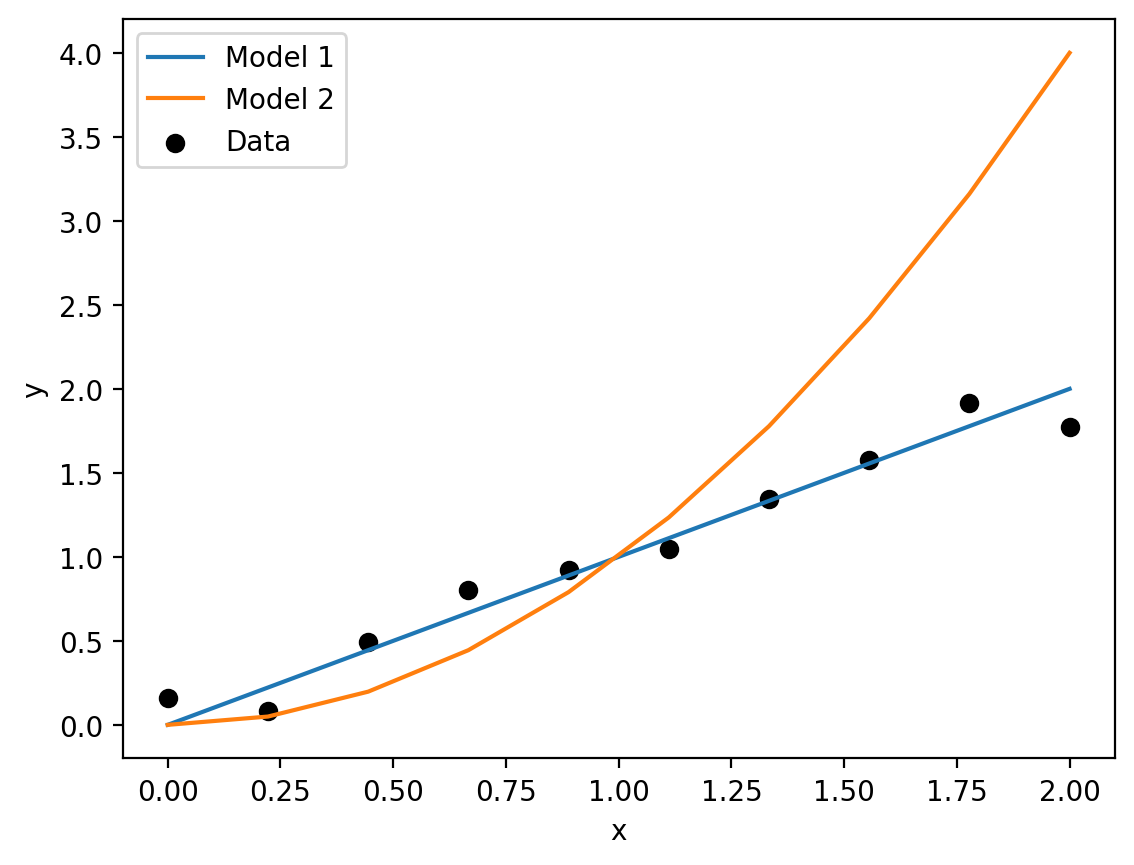

In [31]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 10)
y1 = x
y2 = x**2
y3 = x + np.random.randn(10) * 0.1

fig, ax = plt.subplots()
ax.plot(x, y1, label="Model 1")
ax.plot(x, y2, label="Model 2")
ax.scatter(x, y3, color="black", label="Data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

However, there's a lot more we can do to customize legends to meet our needs. First off, there are other ways of adding our legend that provides us more control. For example, what if we wanted the `Sample Data` entry to appear above the "Model 1" entry?

Every plotting function in matplotlib has as one of its outputs, the object representing the plotted data (what's called in matplotlib an 'Artist'). We can feed in a list of these Artists to the legend function along with the labels we want, and it will produce a legend for us. Let's try this with the previous example.

First, when we get the output from `plot()` note that it's a *list* of line objects, not just one:

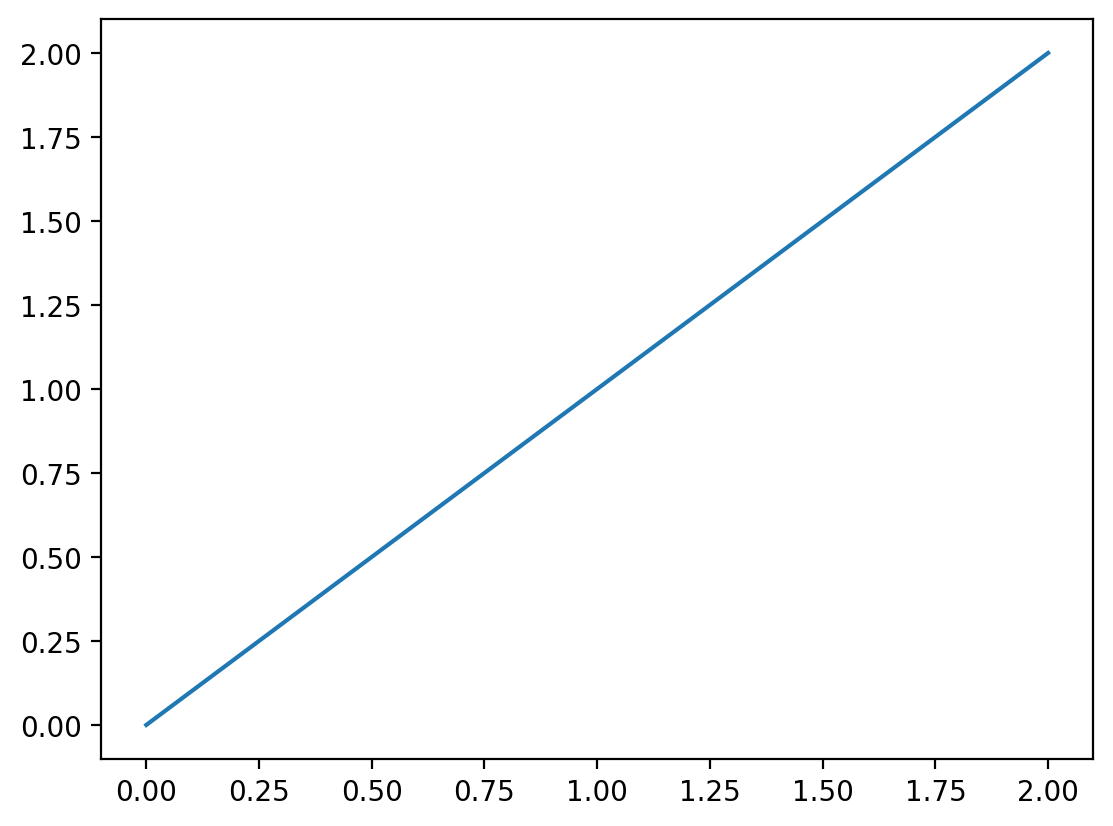

In [32]:
fig, ax = plt.subplots()
line = ax.plot(x, y1)  # Note: plot returns a LIST of lines, not just one
line

Since we need the line object itself, not a list of them, we could just call `lines[0]` which would return the single line object. Alternatively, we can unpack the lines list by adding a comma after the assignment: `line, = ax.plot(x,y1)` which unpacks the list and the one line object becomes stored in `line`.

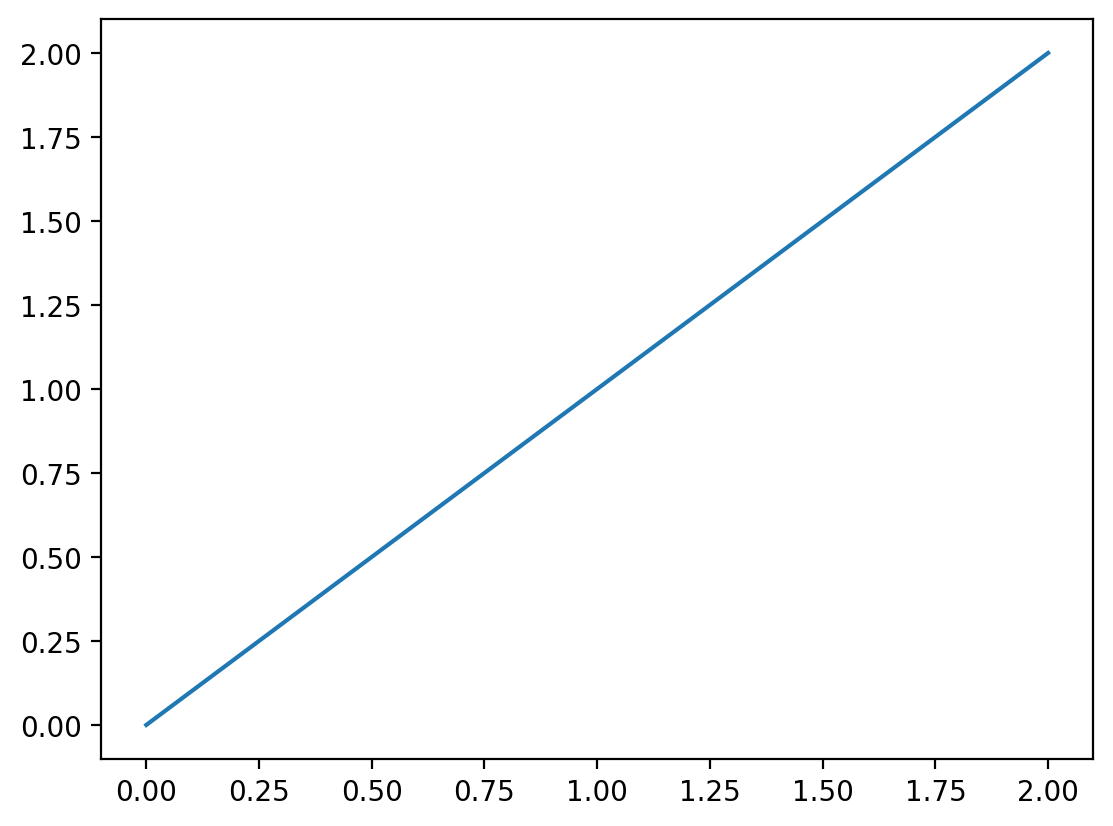

In [33]:
fig, ax = plt.subplots()
(line,) = ax.plot(x, y1)

Now, we can create our new legend:

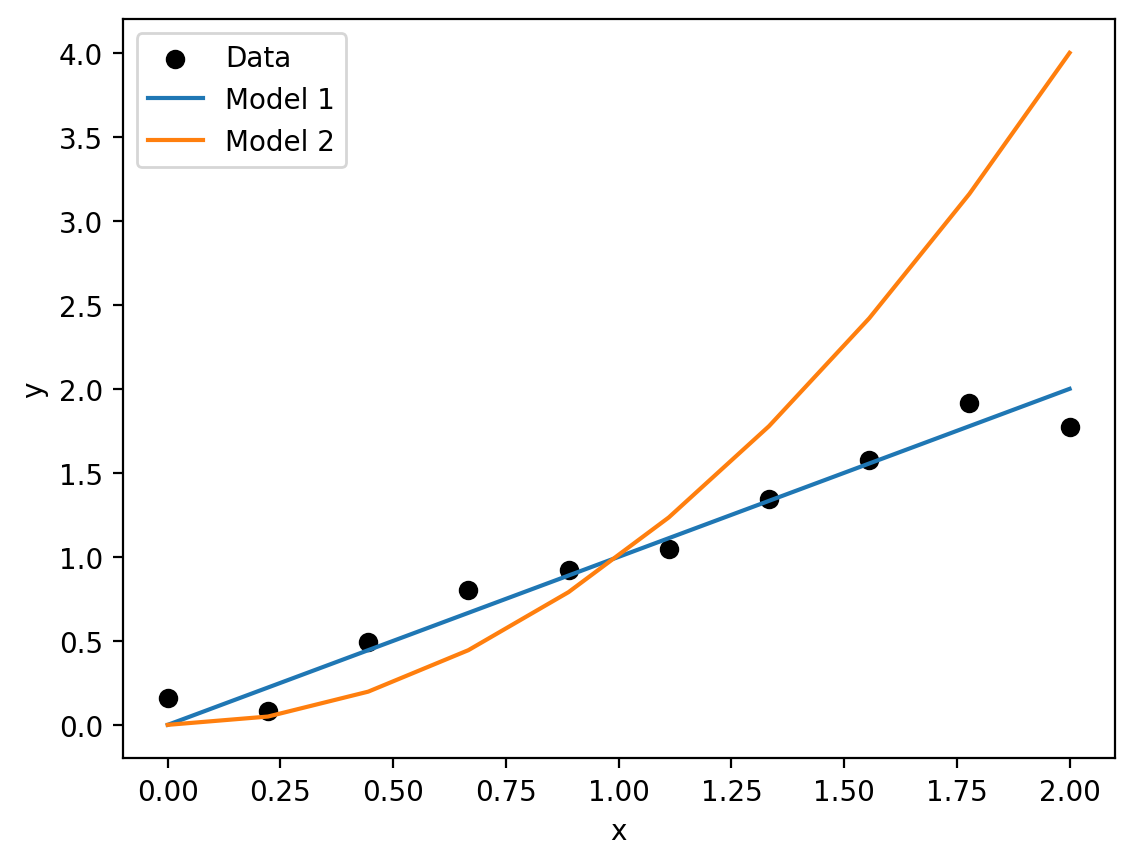

In [34]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend([scatter, line1, line2], ["Data", "Model 1", "Model 2"])

We can even add a title to our legend with the `title` keyword argument:

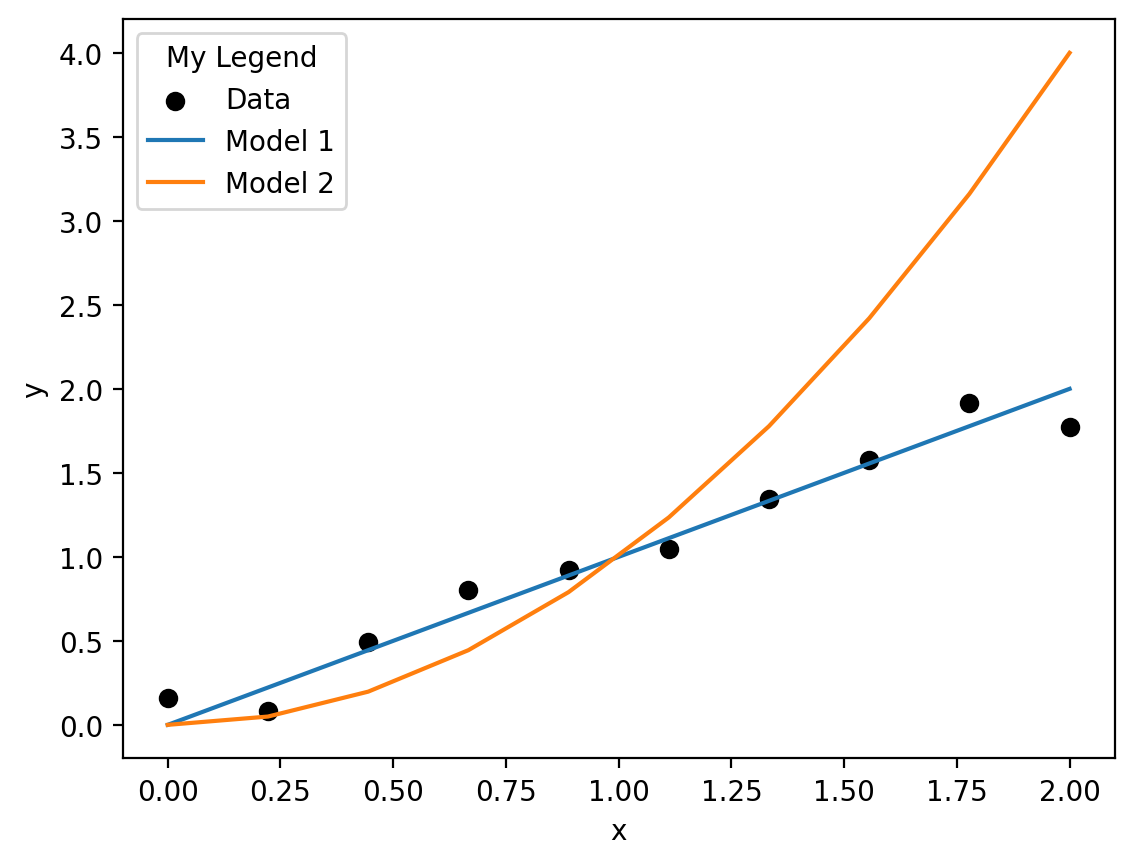

In [53]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend([scatter, line1, line2], ["Data", "Model 1", "Model 2"], title="My Legend")

## Location

Sometimes we want to adjust the location of the legend. Doing this within a plot is simple with the `loc` keyword argument:

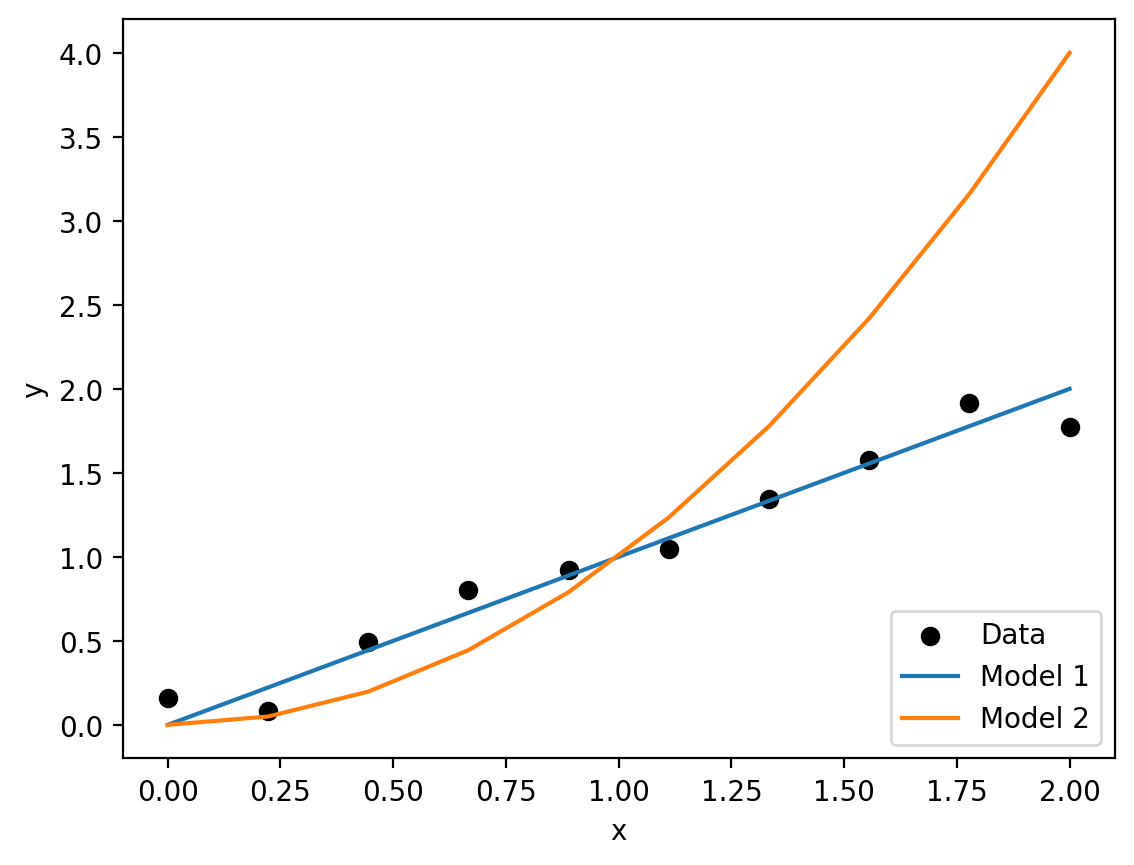

In [35]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend([scatter, line1, line2], ["Data", "Model 1", "Model 2"], loc="lower right")

We can also turn off the bounding box around the legend by setting the `frameon` property to false and make make the legend wider instead of taller by specifying the number of columns `ncol` of legend entries. Here we have three entries so that should provide a fully horizontal legend for us.

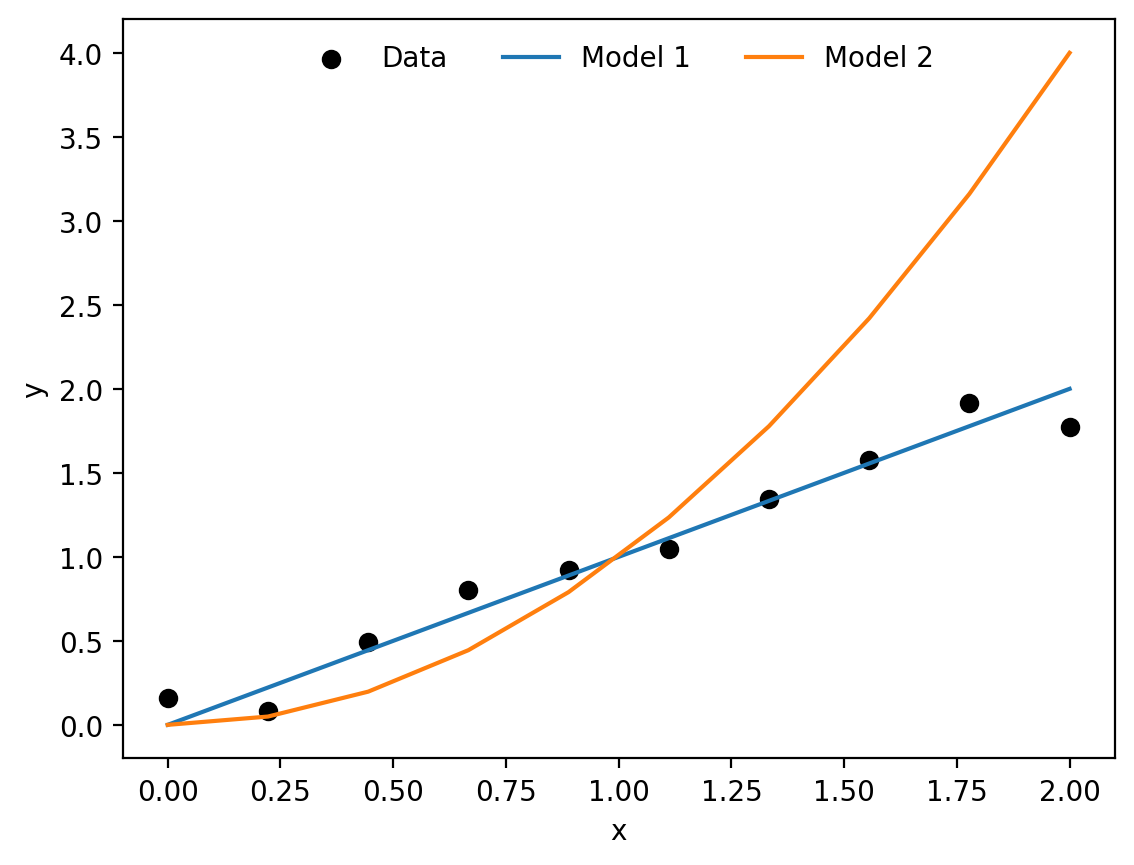

In [36]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    loc="upper center",
    frameon=False,
    ncol=3,
)

We may prefer if the legend sits outside of the axes of the plot. This is also possible with legends. We can use a combination of two properties: `bbox_to_anchor` which sets the anchor point for the legend with respect to the Axes units (not the data units) and `loc` which states where the anchor point is on the legend. For example, if we say the location is "upper left" and we set the anchor point to be the point (1,1) with respect to the figure this means that the upper left of the legend will be positioned at the point (1,1) of the Axes (which is the upper right of the axes)

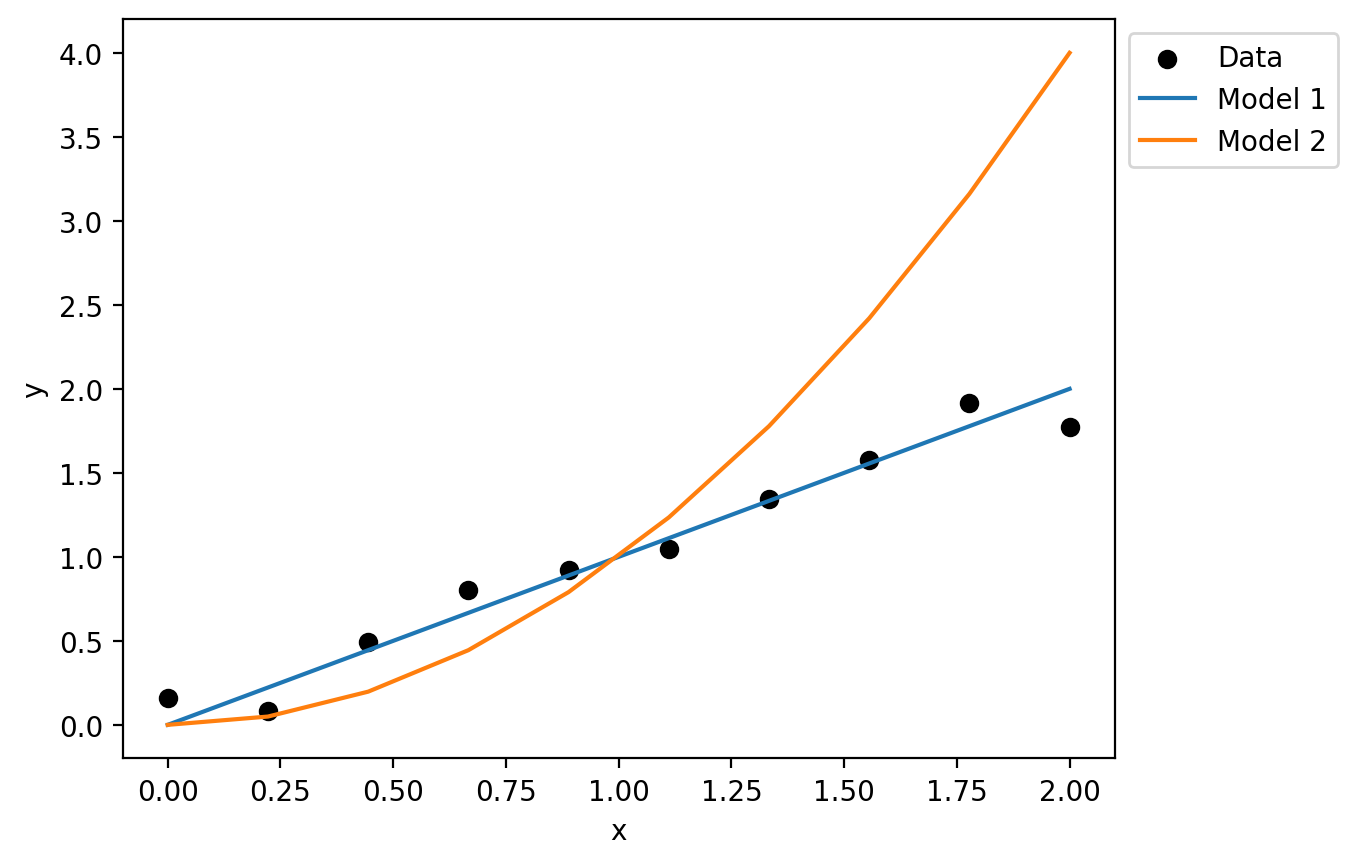

In [39]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(1, 1),
    loc="upper left",
)

You'll notice that the legend is not flush against the right side of the Axes, this is because there is padding there, which can be adjusted with the `borderaxespad` property:

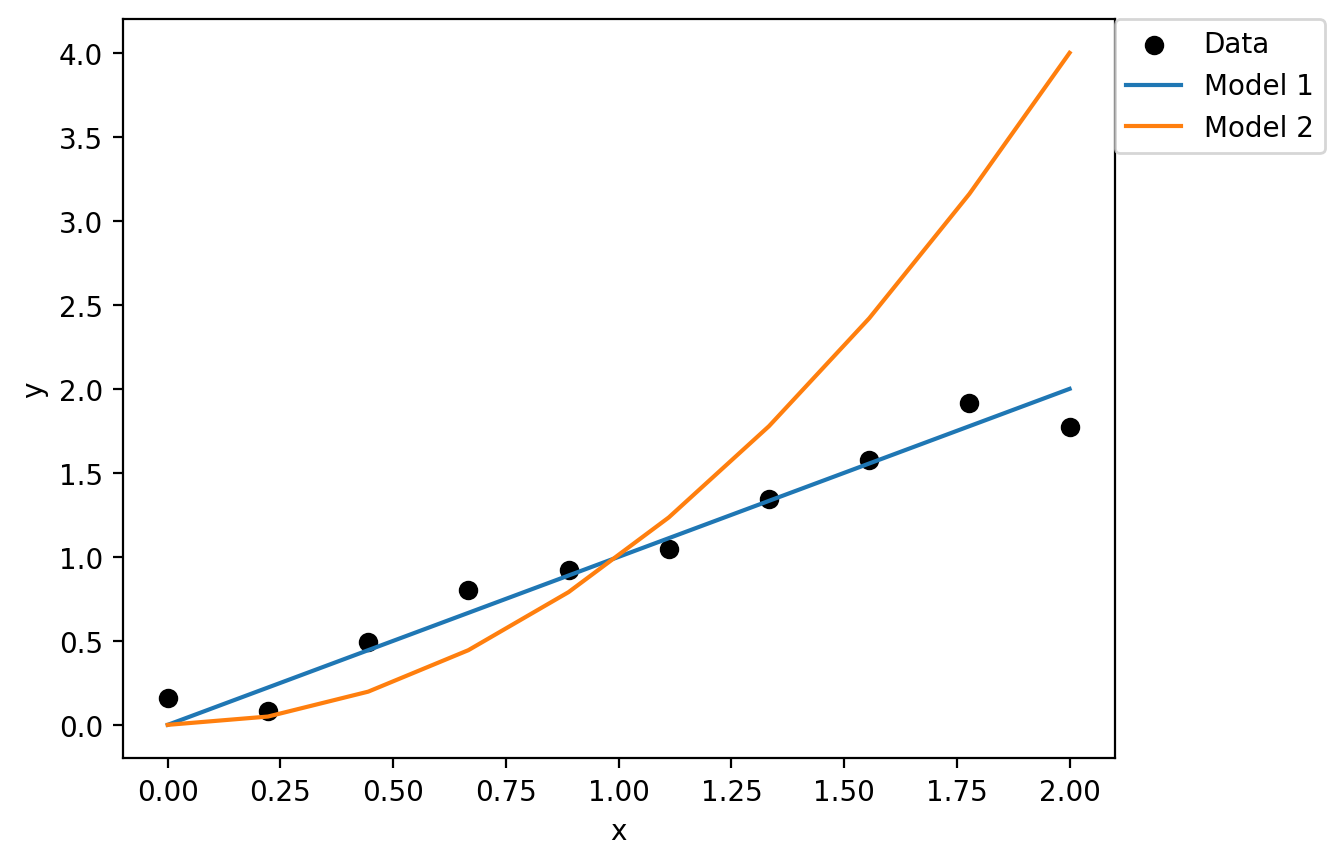

In [40]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    borderaxespad=0,
)

If we remove the bounding box on the legend, this looks quite clean:

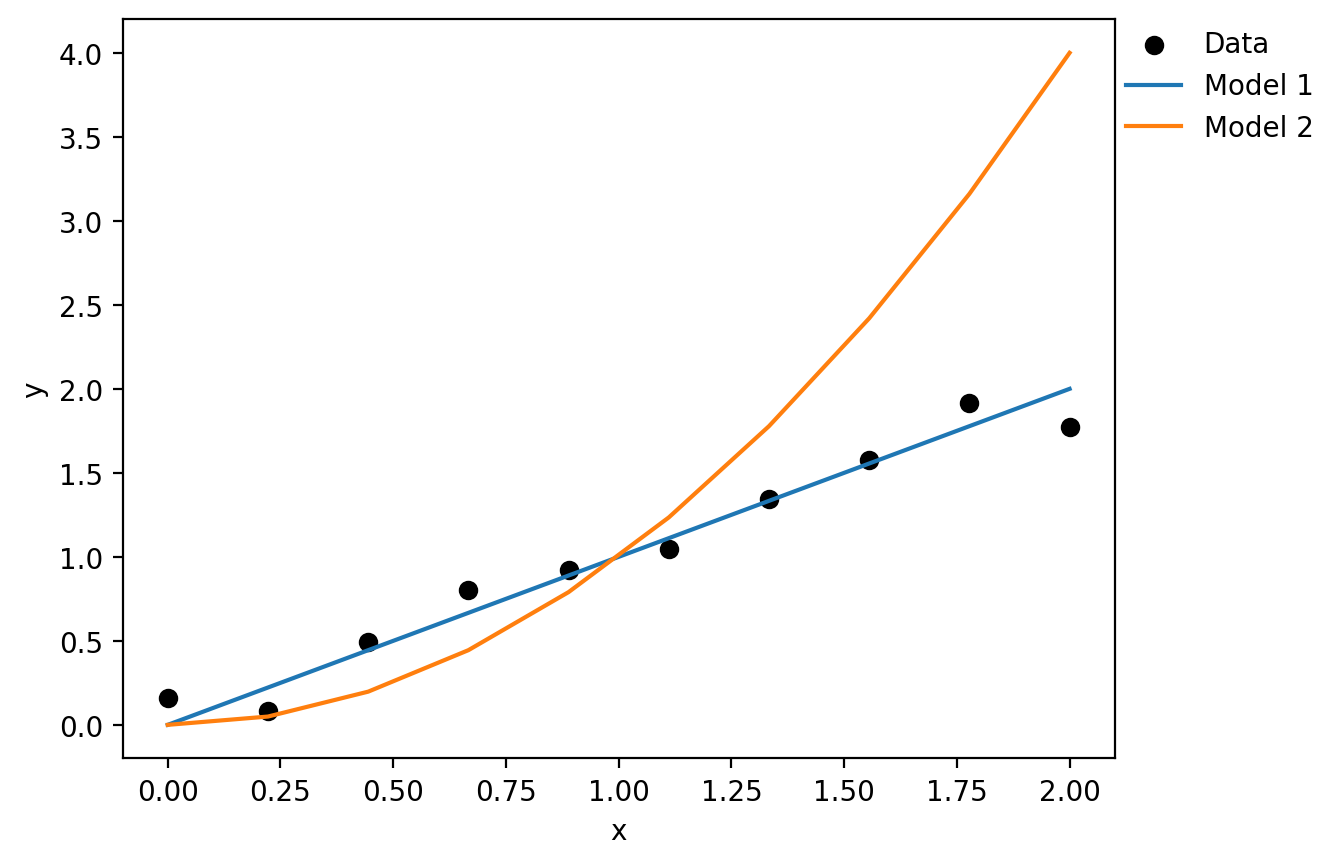

In [41]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    borderaxespad=0,
    frameon=False,
)

Similarly, we could place the legend on top of the plot, centered (`bbox_to_anchor=(0.5, 1)` and `loc='lower center'`), with a horizontal orientation (`ncol=3`)

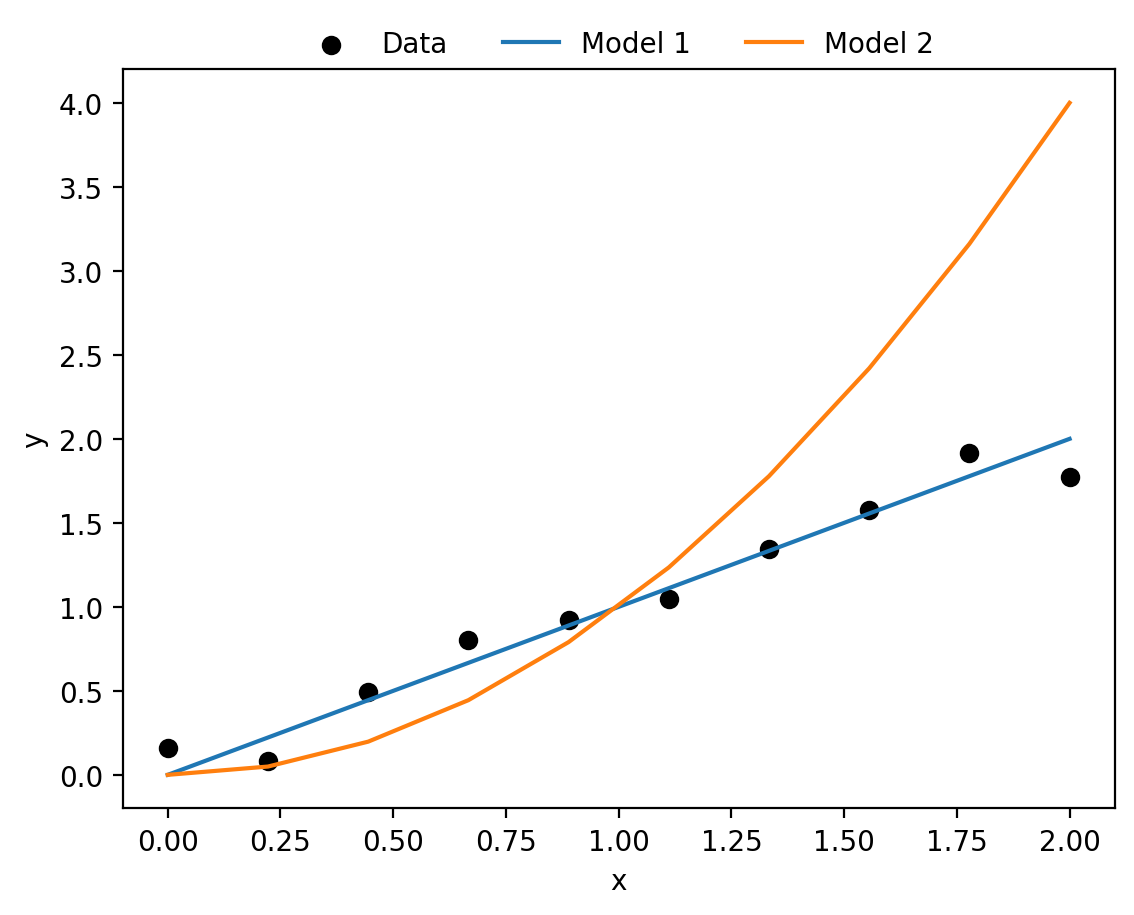

In [45]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter = ax.scatter(x, y3, color="black")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(0.5, 1),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)

## Shared legends across subplots

Sometimes we have the same legend that applies to multiple subplots and only want one legend present on the figure. One way to do this is to create the legend in the Figure rather than the Axes. Let's see how this can be done. Let's start with a subplot:

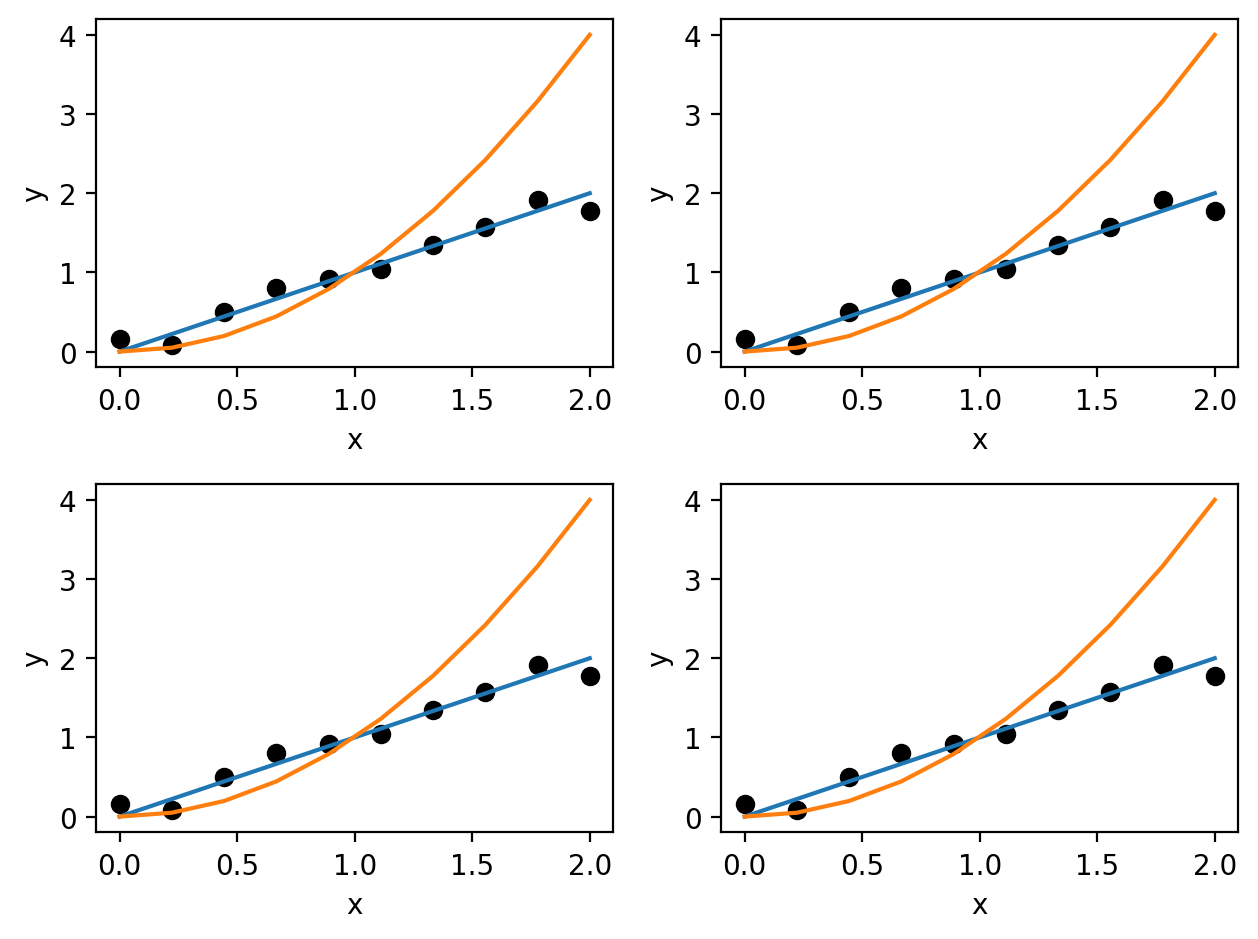

In [49]:
fig, axs = plt.subplots(2, 2)


def myplot(ax, x, y1, y2, y3):
    (line1,) = ax.plot(x, y1)
    (line2,) = ax.plot(x, y2)
    scatter = ax.scatter(x, y3, color="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return [line1, line2, scatter]


for ax in axs.flatten():
    line1, line2, scatter = myplot(ax, x, y1, y2, y3)

fig.tight_layout()

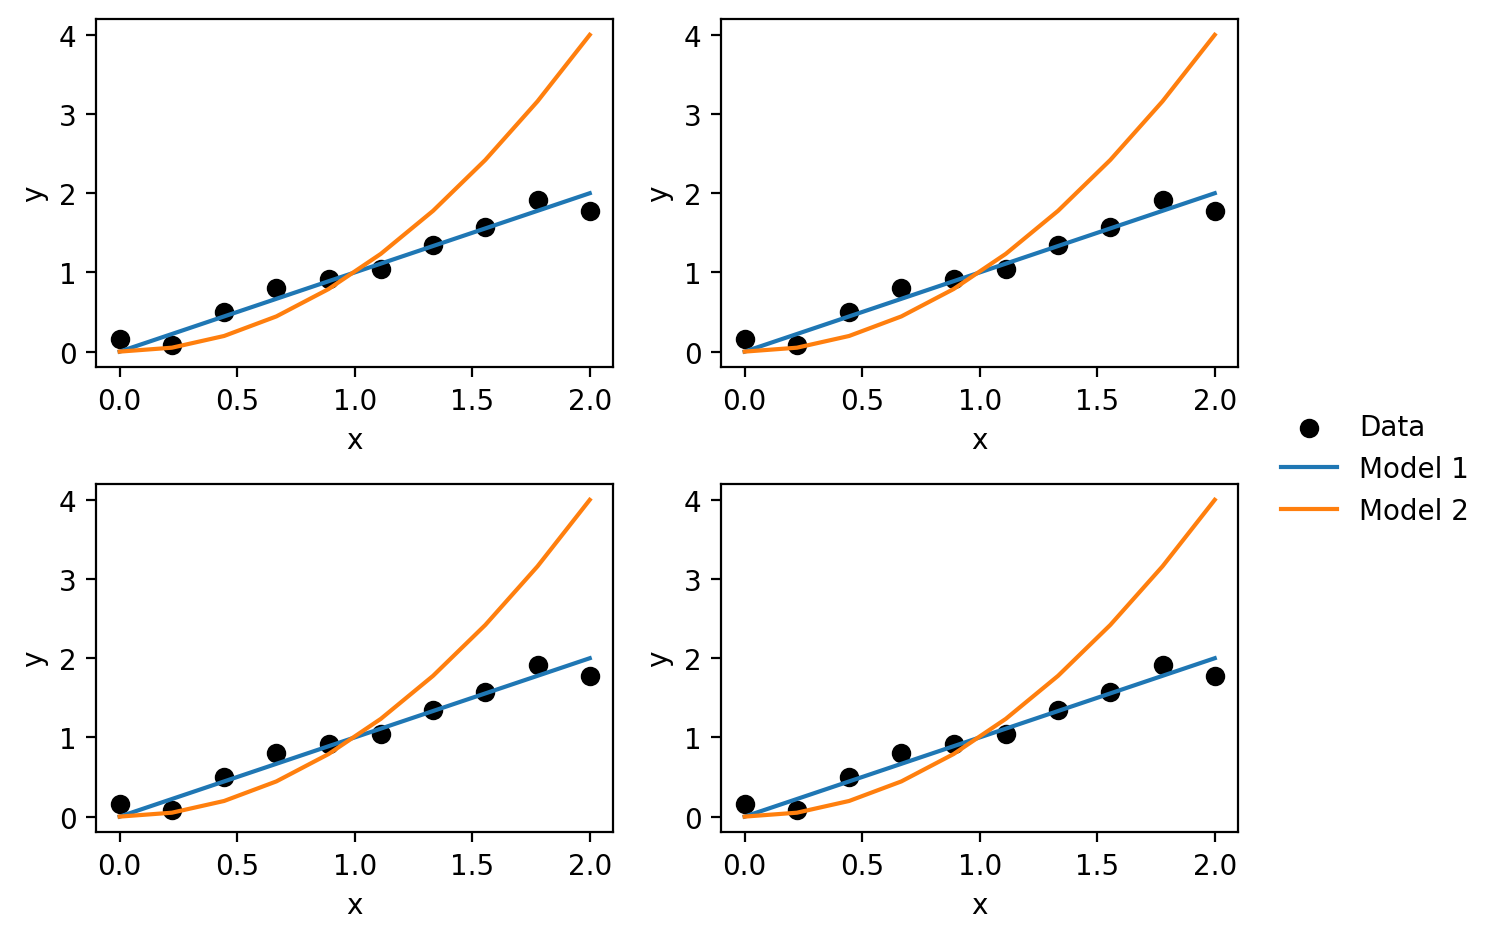

In [52]:
fig, axs = plt.subplots(2, 2)


def myplot(ax, x, y1, y2, y3):
    (line1,) = ax.plot(x, y1)
    (line2,) = ax.plot(x, y2)
    scatter = ax.scatter(x, y3, color="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    return [line1, line2, scatter]


for ax in axs.flatten():
    line1, line2, scatter = myplot(ax, x, y1, y2, y3)

fig.tight_layout()

fig.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(1, 0.5),
    loc="center left",
    borderaxespad=0,
    frameon=False,
)

This can be quite useful to avoid redundancy in a figure and make it easier to read quickly. 

A figure legend can even contain content from multiple plots, as in this example:


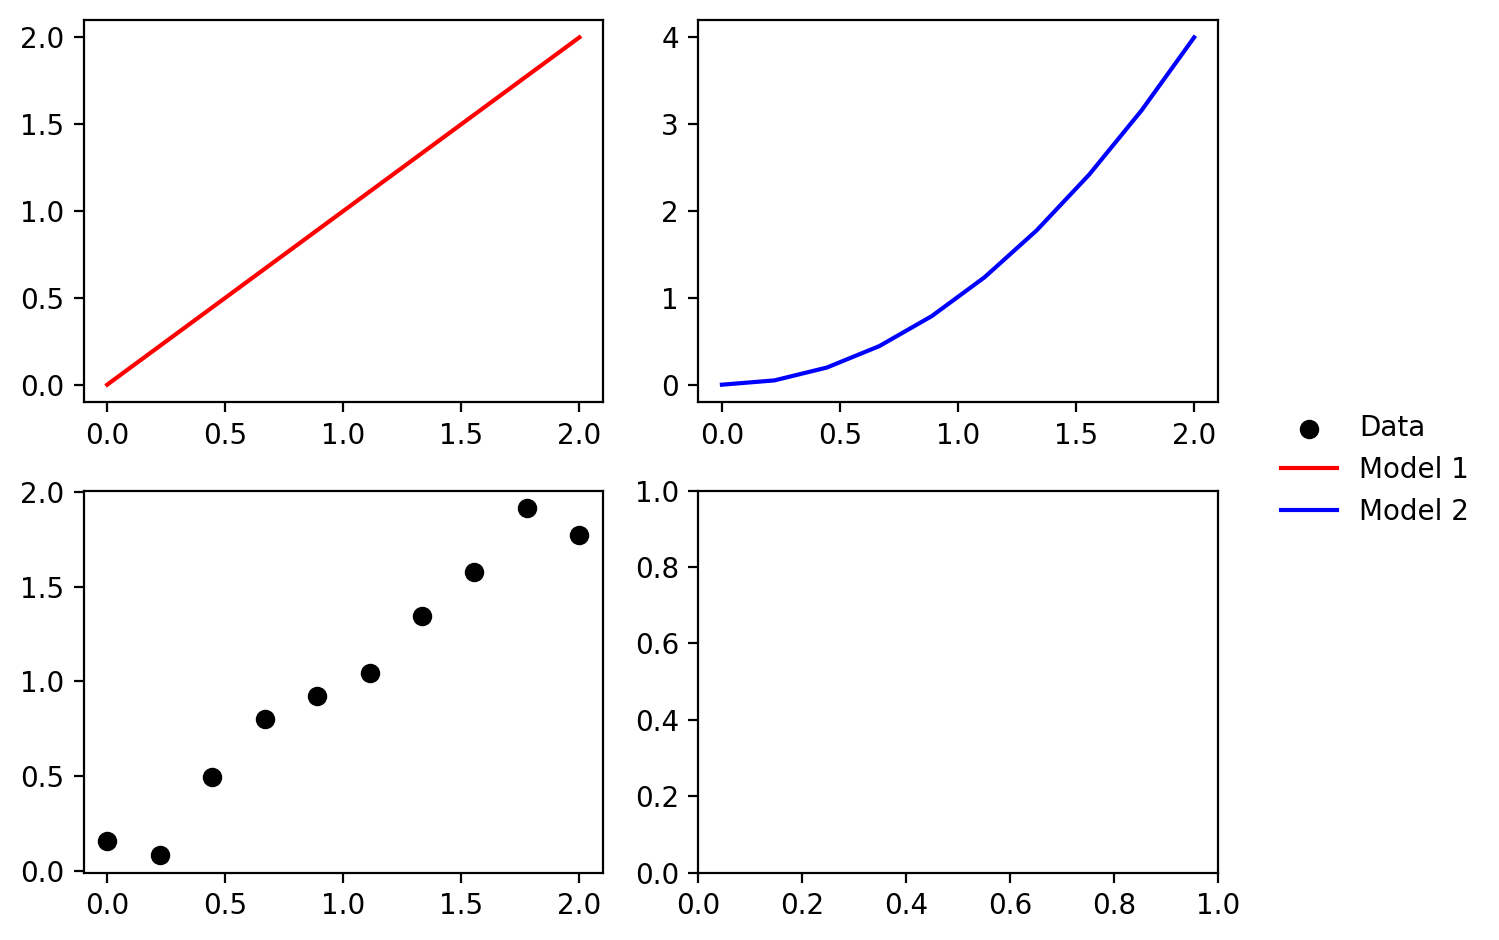

In [71]:
fig, axs = plt.subplots(2, 2)

(line1,) = axs[0, 0].plot(x, y1, color="red")
(line2,) = axs[0, 1].plot(x, y2, color="blue")
scatter = axs[1, 0].scatter(x, y3, color="black")

fig.tight_layout()

fig.legend(
    [scatter, line1, line2],
    ["Data", "Model 1", "Model 2"],
    bbox_to_anchor=(1, 0.5),
    loc="center left",
    borderaxespad=0,
    frameon=False,
)

## Multiple legends on the same Axes

Sometimes it may be helpful to have multiple legend groups, but matplotlib overwrites one legend with another if you call `legend()` for a second time. Let's say we wanted one legend group for our lines and another for our scatter plots. We can do this by manually adding a second legend to the plot. Every object is represented as an "artist" and we can add a new artist manually.

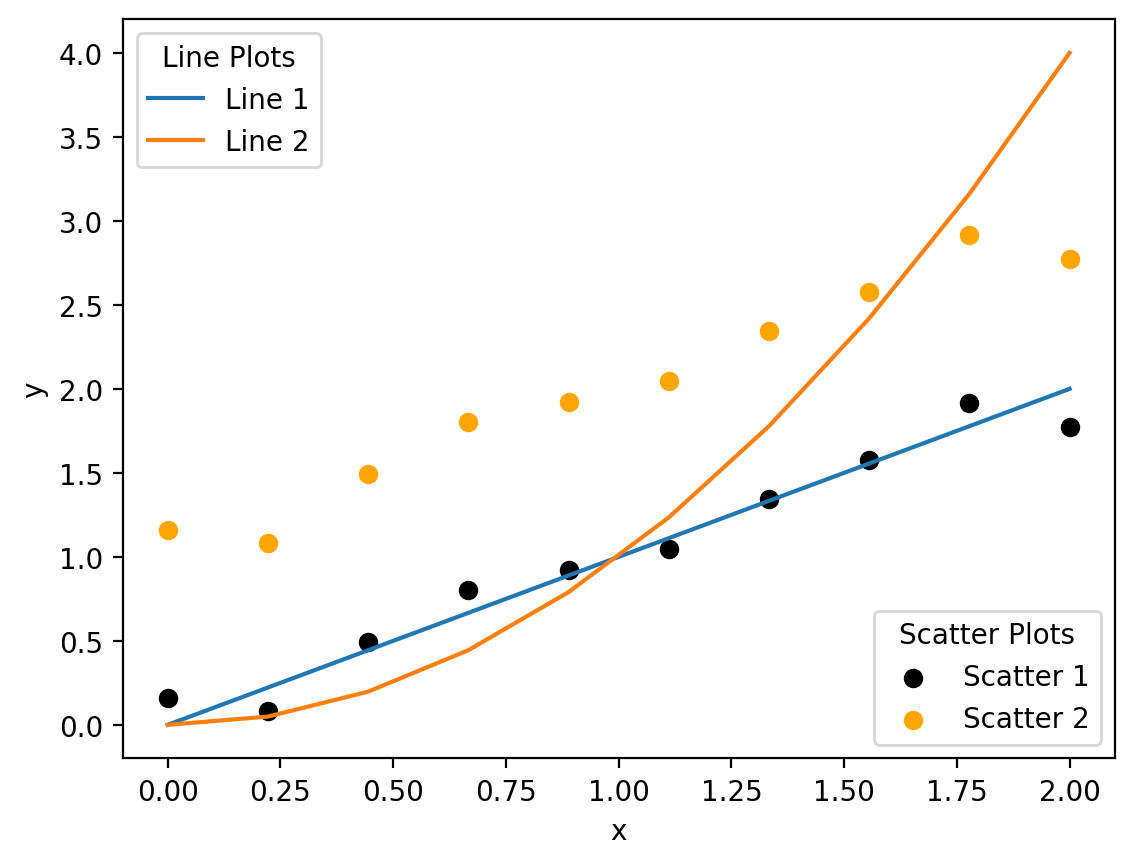

In [77]:
fig, ax = plt.subplots()
(line1,) = ax.plot(x, y1)
(line2,) = ax.plot(x, y2)
scatter1 = ax.scatter(x, y3, color="black")
scatter2 = ax.scatter(x, y3 + 1, color="orange")
ax.set_xlabel("x")
ax.set_ylabel("y")

legend1 = ax.legend(
    [line1, line2], ["Line 1", "Line 2"], title="Line Plots", loc="upper left"
)

ax.add_artist(legend1)

ax.legend(
    [scatter1, scatter2],
    ["Scatter 1", "Scatter 2"],
    title="Scatter Plots",
    loc="lower right",
)

## Custom legend elements

Sometimes the default legend that is produced just doesn't meet our needs. Consider this scatter plot example from earlier. It's missing a legend that allows us to understand how to read the size of the markers as they represent the population of each country. But there's no standard matplotlib way to accomplish this. We'd like to have a set of circles where each circle corresponds to a different population size so that all of the sizes of the circles in the plot can be interpreted.

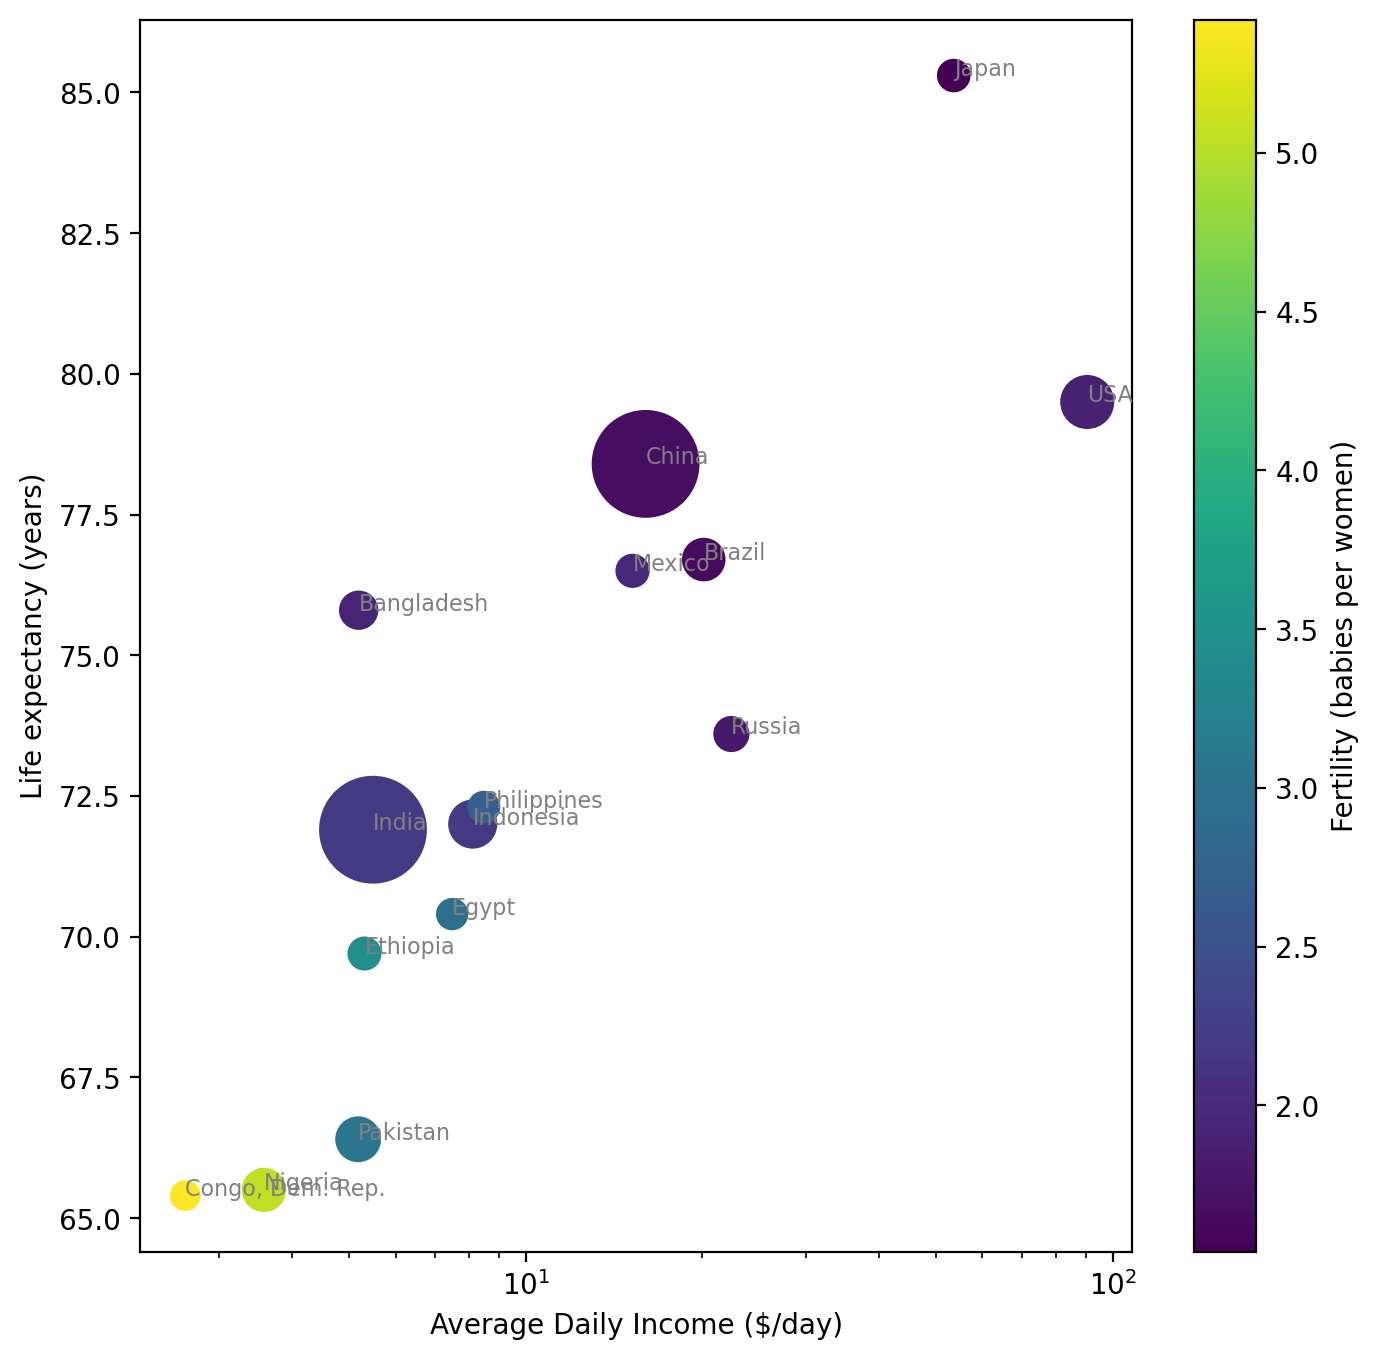

In [67]:
import pandas as pd

# Load our data
data = pd.read_csv("data/gap-minder-statistics.csv")
largest = data.sort_values(by="population", ascending=False).iloc[:15]

# Plot the figure and a colorbar where the size of the markers is the population and the colorbar represents fertility
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(
    largest["average_daily_income"],
    largest["life_expectancy"],
    c=largest["fertility"],
    s=largest["population"],
)
ax.set_xlabel("Average Daily Income ($/day)")
ax.set_ylabel("Life expectancy (years)")
ax.set_xscale("log")

fig.colorbar(scatter, ax=ax, label="Fertility (babies per women)")

# Add text labels so the country can be identified
for vx, vy, vs in zip(
    largest["average_daily_income"], largest["life_expectancy"], largest["country"]
):
    ax.text(vx, vy, vs, fontsize=8, color="gray")

This is a little bit of a trick I first encountered in Jake VanderPlas's excellent book: "Python data science handbook: essential tools for working with data," another great reference. We can create our own custom legend entries by "plotting" data that is not actually visible in the figure. This process creates what are known as "proxy artists" which are elements that are not displayed in the plot, but their only purpose is to add entries in the legend. Let's start with a simpler example before we apply this to the scatter plot above.

To accomplish this we can "add" elements to the plot without specifying x or y locations by feeding in empty lists. This allows us to reference the type of plot without actually adding something to the plot. Here's an example where we create a fake blue line and red scatter plot marker.

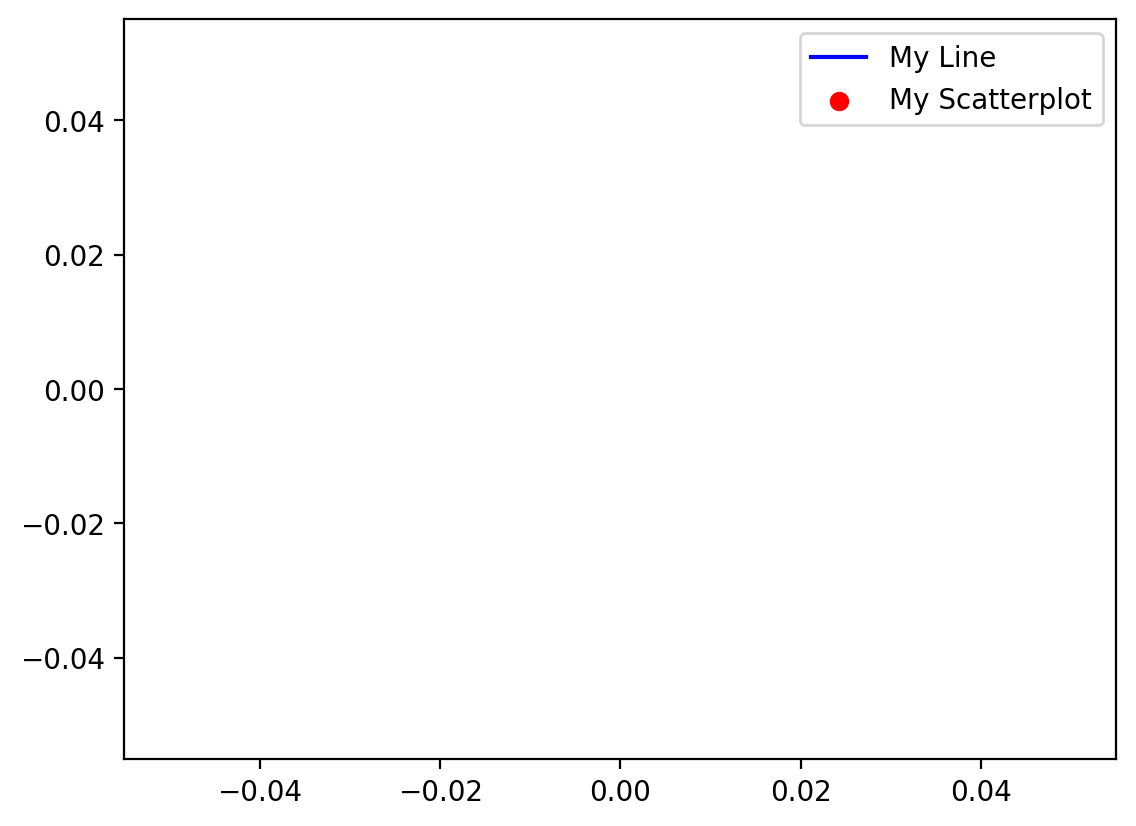

In [68]:
fig, ax = plt.subplots()
(line,) = ax.plot([], [], color="blue")
scatter = ax.scatter([], [], c="red")
ax.legend([line, scatter], ["My Line", "My Scatterplot"])

We can apply this same approach to our scatter plot. Here we want to create scatter plot markers that represent the range of population that's present in the data. Let's create markers for 10 million, 100 million, and 1 billion people. We create an empty scatter plot with each of those sizes and label them accordingly:

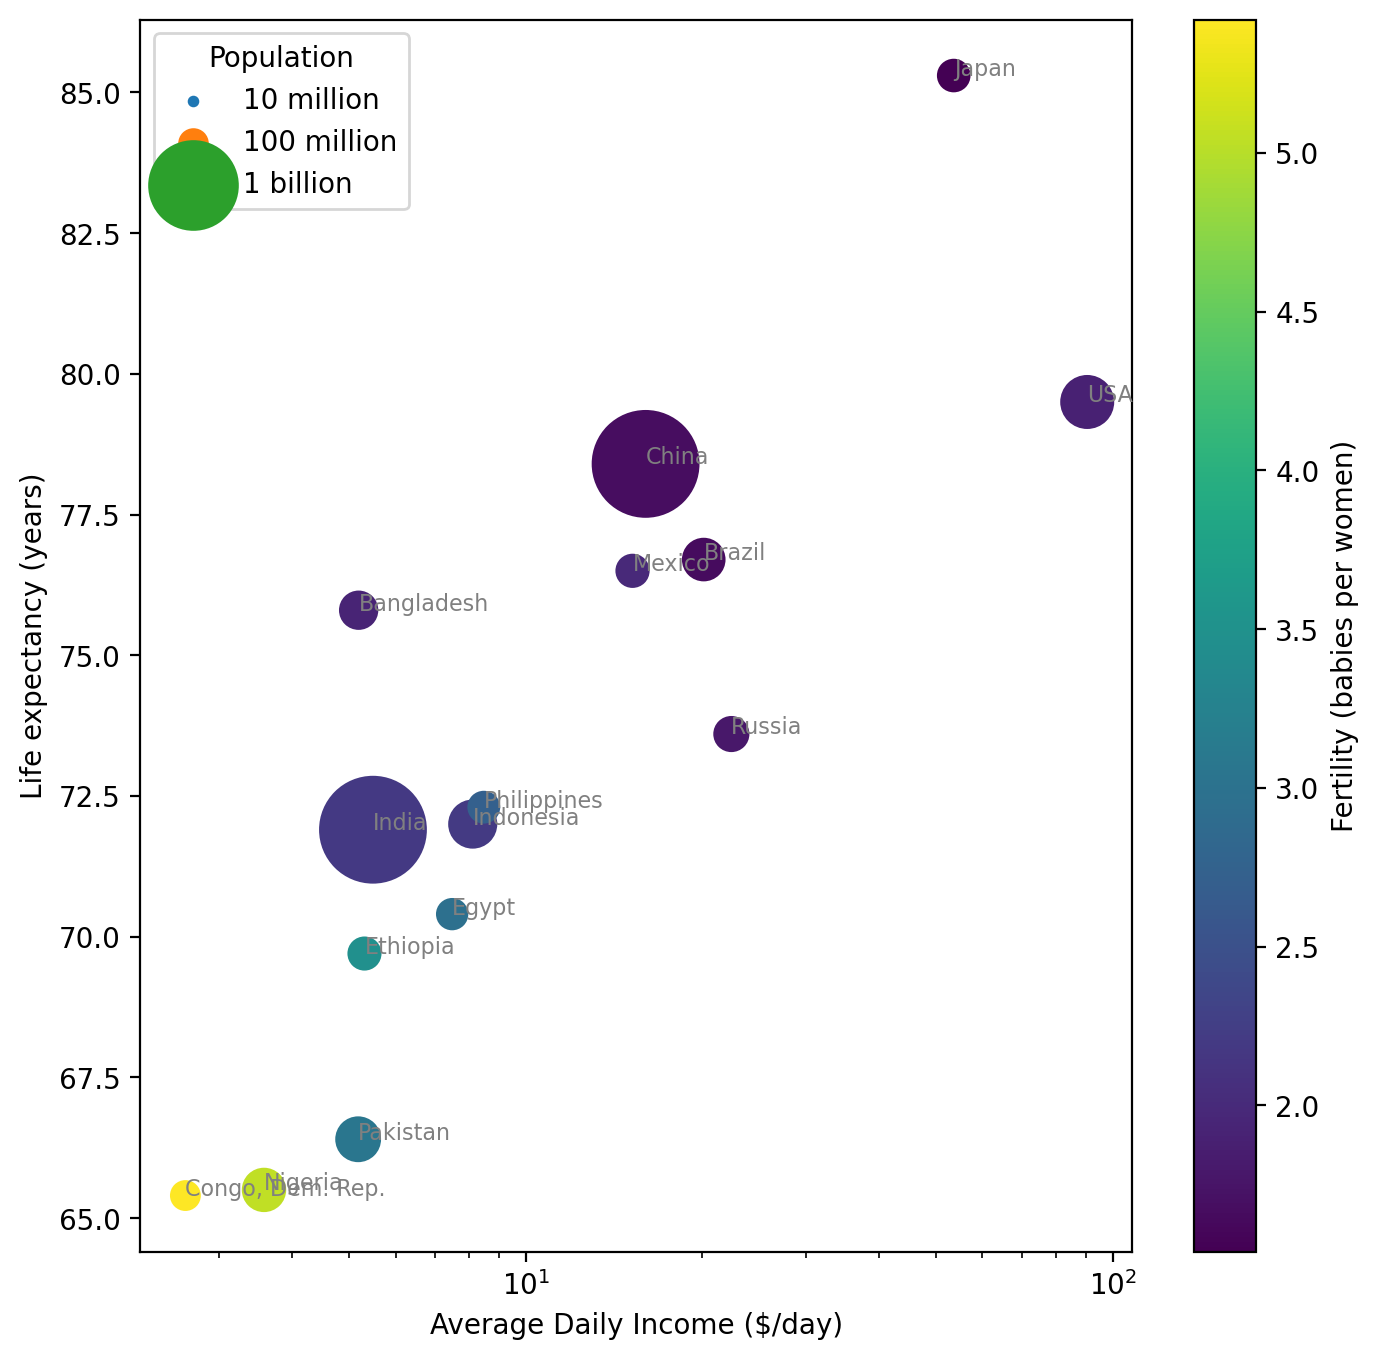

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(
    largest["average_daily_income"],
    largest["life_expectancy"],
    c=largest["fertility"],
    s=largest["population"],
)
ax.set_xlabel("Average Daily Income ($/day)")
ax.set_ylabel("Life expectancy (years)")
ax.set_xscale("log")

fig.colorbar(scatter, ax=ax, label="Fertility (babies per women)")

for vx, vy, vs in zip(
    largest["average_daily_income"], largest["life_expectancy"], largest["country"]
):
    ax.text(vx, vy, vs, fontsize=8, color="gray")

# Plot empty x and y coordinates to create the legend entries corresponding to different population values
population_for_legend = [10, 100, 1000]
legend_labels = ["10 million", "100 million", "1 billion"]
for pop, label in zip(population_for_legend, legend_labels):
    ax.scatter([], [], s=pop, label=label)
ax.legend(title="Population")

This is really nice except that our markers are overlapping one another and are different colors. Let's set them all to a neutral gray. We can adjust the spacing between the legend entries using the `handleheight` keyword argument. Lastly, we'll turn off the frame around the legend and align everything to the left (including the title).

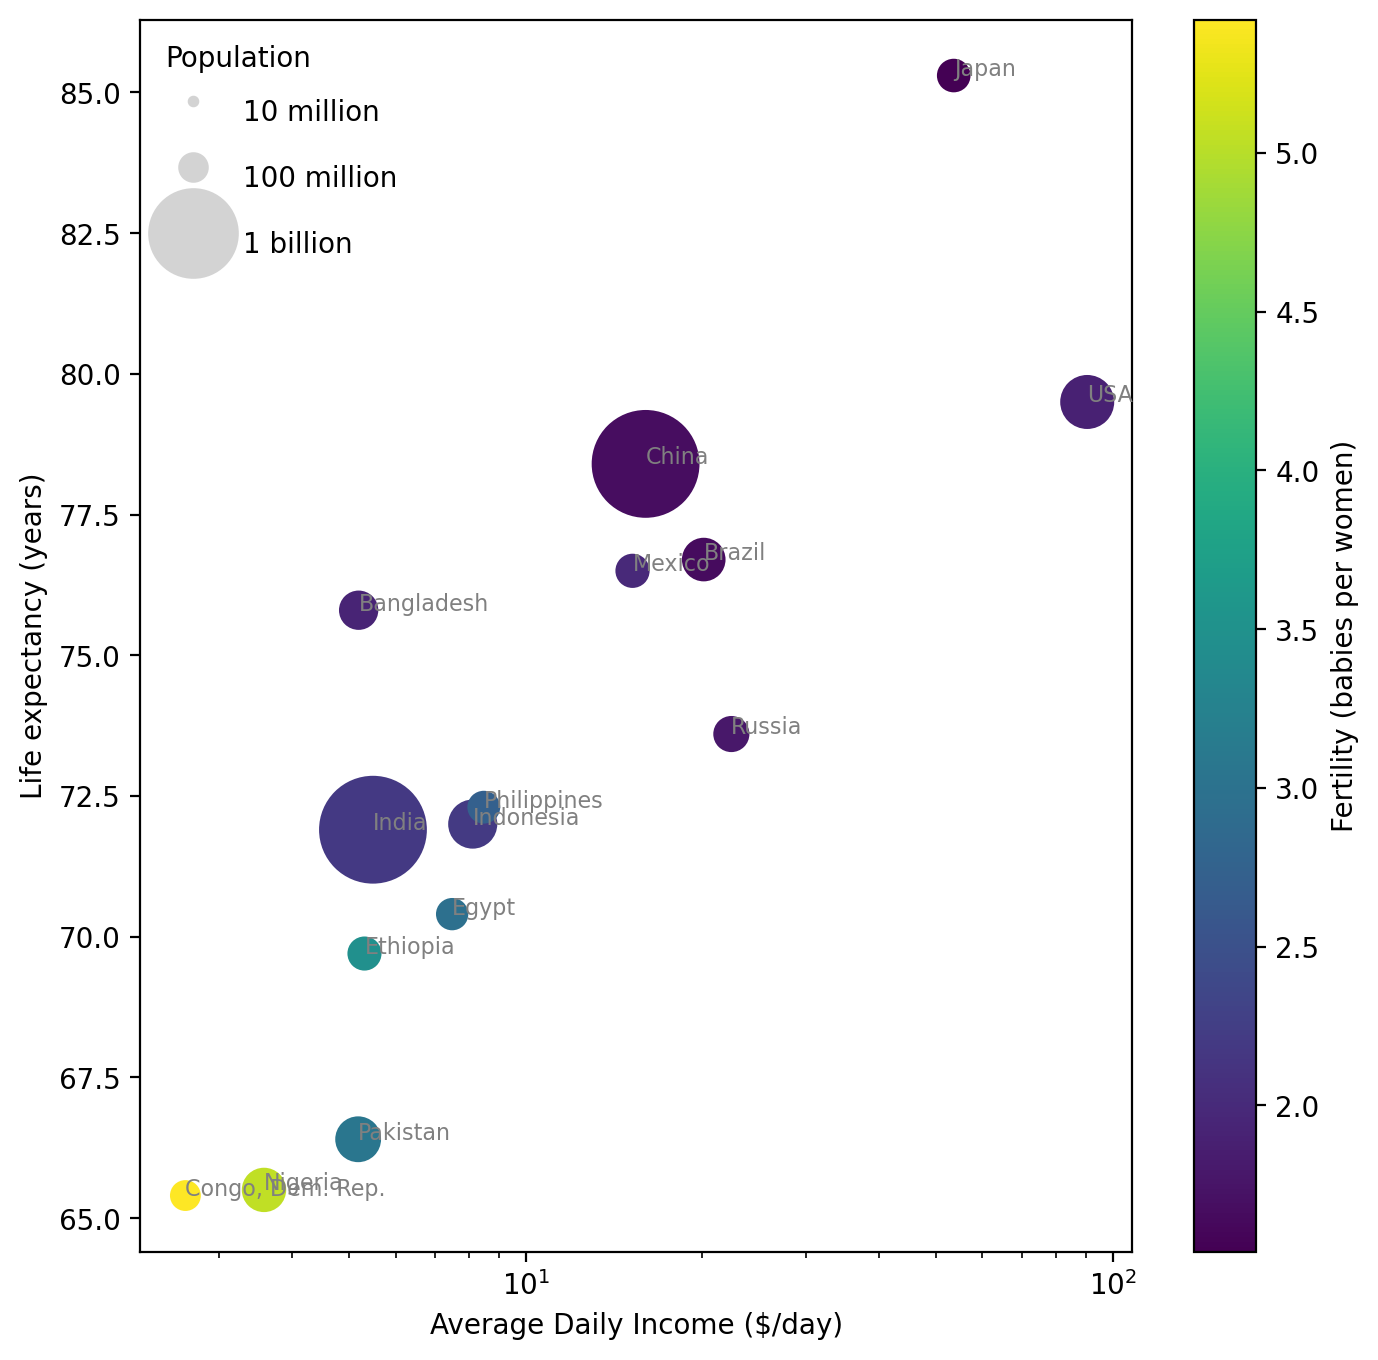

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(
    largest["average_daily_income"],
    largest["life_expectancy"],
    c=largest["fertility"],
    s=largest["population"],
)
ax.set_xlabel("Average Daily Income ($/day)")
ax.set_ylabel("Life expectancy (years)")
ax.set_xscale("log")

fig.colorbar(scatter, ax=ax, label="Fertility (babies per women)")

for vx, vy, vs in zip(
    largest["average_daily_income"], largest["life_expectancy"], largest["country"]
):
    ax.text(vx, vy, vs, fontsize=8, color="gray")

# Plot empty x and y coordinates to create the legend entries corresponding to different population values
population_for_legend = [10, 100, 1000]
legend_labels = ["10 million", "100 million", "1 billion"]
for pop, label in zip(population_for_legend, legend_labels):
    ax.scatter([], [], s=pop, label=label, color="lightgrey")
ax.legend(title="Population", handleheight=2.5, frameon=False, alignment="left")

This is greatly improved! Legends in matplotlib are quite flexible to accommodate a variety of situations. As has been the trend throughout this course, it's very easy to use the basic, standard versions and more complex the more customized you'd like to make your plots. Those customizations can be worth it to communicate your message clearly and completely.

## References

- Matplotlib's [Legend documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend)
- VanderPlas, J., 2016. Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".